In [2]:
import pandas as pd
df = pd.read_csv("data_full.csv", index_col=0)

In [3]:
df['prop_0-14']=df['Numbers of people from 0-14 years old']/df['Number of inhabitants']
df['prop_15-24']=df['Number of people from 15-24 years old']/df['Number of inhabitants']
df['prop_25-44']= df['Number of people from 25-44 years old']/df['Number of inhabitants']
df['prop_45-64']=df['Number of people from 45-64 years old']/df['Number of inhabitants']
df['prop_65+']=df['Number of people >= 65 years old']/df['Number of inhabitants']
df.dropna(inplace=True)

<Axes: >

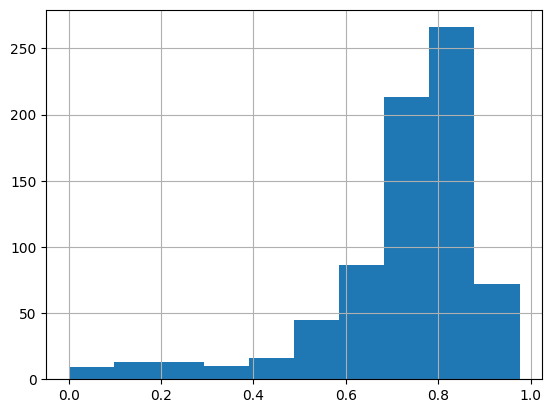

In [4]:
# Define df_score DataFrame
df_score = pd.DataFrame()

# Define scoring function
def scoring(row, column):
    if row[column] > df[column].mean():
        return df[column].mean() / row[column]
    else:
        return row[column] / df[column].mean()

# Apply the function to each row in the 'prop_0-14' column
df_score['score_0-14'] = df.apply(scoring, column="prop_0-14", axis=1)
df_score['score_15-24'] = df.apply(scoring, column="prop_15-24", axis=1)
df_score['score_25-44'] = df.apply(scoring, column="prop_25-44", axis=1)
df_score['score_45-64'] = df.apply(scoring, column="prop_45-64", axis=1)
df_score['score_65+'] = df.apply(scoring, column="prop_65+", axis=1)
df_score['score_age']=(df_score['score_0-14']+df_score['score_15-24']+df_score['score_25-44']+df_score['score_45-64']+df_score['score_65+'])/5
# Display df_score
df_score["score_age"].hist()